# Titanic Project

## Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
print('Setup complete')

Setup complete


In [15]:
#Importing training dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")   
df                           

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
#Setting Index 
df.set_index("PassengerId", inplace=True)       
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# basic info of the training dataset
df.info()                                      

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [18]:
df['Survived'].value_counts(normalize=True)     

0    0.616162
1    0.383838
Name: Survived, dtype: float64

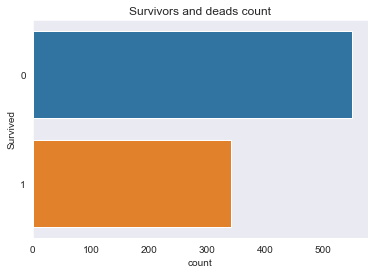

In [19]:
a = sns.countplot(y=df['Survived']).set_title('Survivors and deads count')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


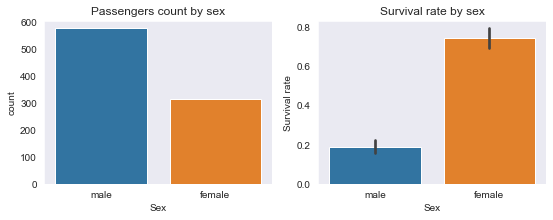

In [21]:
# Feature Analysis and Selection
# Plotting Passenger count and survival rate by sex
fig, axarr = plt.subplots(1, 2, figsize=(9,3))
a = sns.countplot(df['Sex'], ax=axarr[0]).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=df, ax=axarr[1]).set_ylabel('Survival rate')

In [23]:
# Analysing Survival by Passenger Class
df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

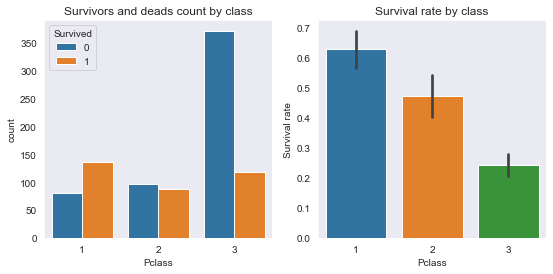

In [24]:
# Plotting 'Survived' vs 'PClass' graph
fig, axarr = plt.subplots(1,2,figsize=(9,4))
a = sns.countplot(x='Pclass', hue='Survived', data=df, 
                  ax=axarr[0]).set_title('Survivors and deads count by class')
axarr[1].set_title('Survival rate by class')
b = sns.barplot(x='Pclass', y='Survived', data=df, ax=axarr[1]).set_ylabel('Survival rate')

In [25]:
#Analysing survival rate by 'Sex' and 'Pclass'
df.groupby(['Pclass', 'Sex']).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

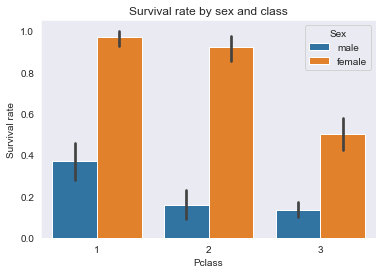

In [26]:
#Plotting graph 
plt.title('Survival rate by sex and class')
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df).set_ylabel('Survival rate')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


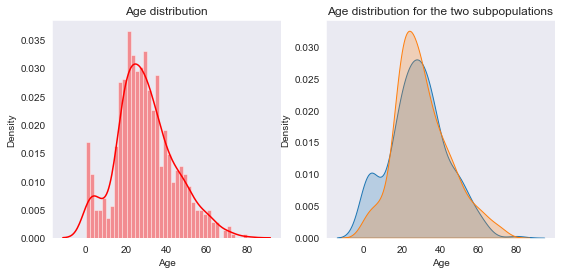

In [27]:
# Age distribution Plot
fig, axarr = plt.subplots(1,2,figsize=(9,4))
axarr[0].set_title('Age distribution')
f = sns.distplot(df['Age'], color='red', bins=40, ax=axarr[0])
axarr[1].set_title('Age distribution for the two subpopulations')
g = sns.kdeplot(df['Age'].loc[df['Survived'] == 1], 
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Age')
g = sns.kdeplot(df['Age'].loc[df['Survived'] == 0], 
                shade=True, ax=axarr[1], label='Not Survived')

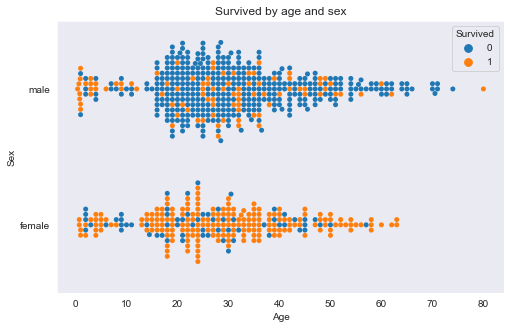

In [28]:
# Analysing Survival by 'Age' and 'Sex'
plt.figure(figsize=(8,5))
g = sns.swarmplot(y='Sex', x='Age', hue='Survived', data=df).set_title('Survived by age and sex')

In [30]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


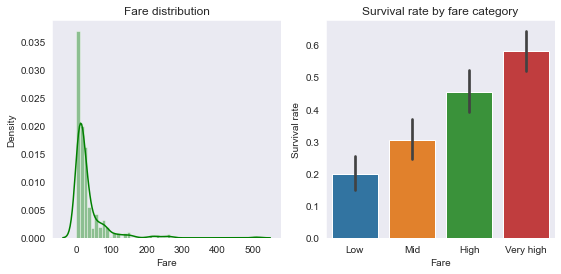

In [35]:
# Plotting 'Fare' vs Survival Rate Graph
fig, axarr = plt.subplots(1,2,figsize=(9,4))
f = sns.distplot(df.Fare, color='g', ax=axarr[0]).set_title('Fare distribution')
fare_ranges = pd.qcut(df.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])
axarr[1].set_title('Survival rate by fare category')
a = sns.barplot(x=fare_ranges, y=df.Survived, ax=axarr[1]).set_ylabel('Survival rate')

In [38]:
# At a first look we see that higher the fare, higher was the possibility of surviving.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


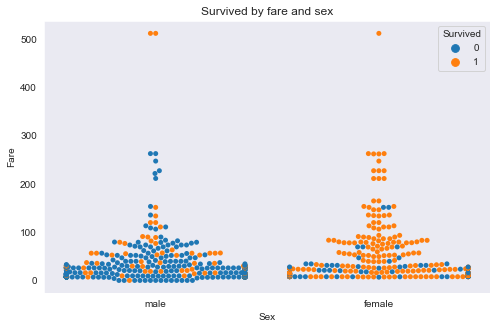

In [37]:
# Swarm plot of Survival by 'Fare' and 'Sex'
plt.figure(figsize=(8,5))
a = sns.swarmplot(x='Sex', y='Fare', hue='Survived',data=df).set_title('Survived by fare and sex')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


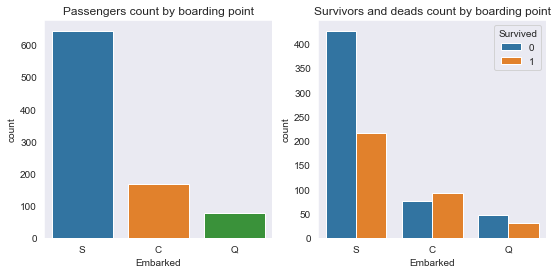

In [39]:
# Analysing Survival by Boarding Point('Embarked')
fig, axarr = plt.subplots(1,2,figsize=(9,4))
sns.countplot(df['Embarked'], ax=axarr[0]).set_title('Passengers count by boarding point')
p = sns.countplot(x = 'Embarked', hue = 'Survived', data = df, 
                  ax=axarr[1]).set_title('Survivors and deads count by boarding point')

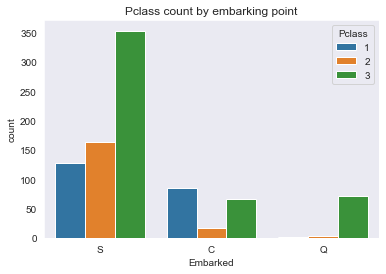

In [40]:
#Plot of 'Pclass' count vs embarking point
a = sns.countplot(data=df, x='Embarked', hue='Pclass').set_title('Pclass count by embarking point')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


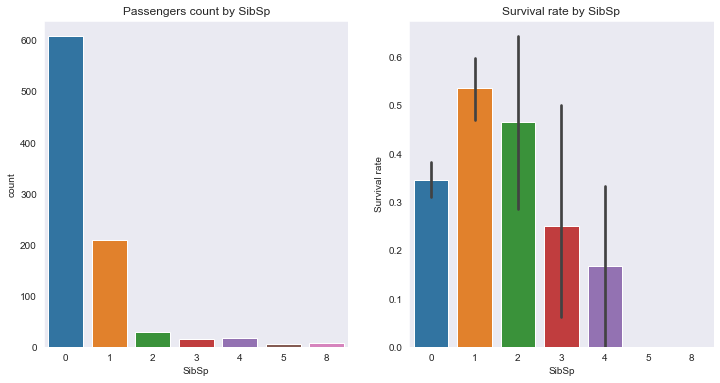

In [41]:
# Analysing passenger count and survival rate by 'Sibsp'(no. of siblings and/or spouses)
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(df['SibSp'], ax=axarr[0]).set_title('Passengers count by SibSp')
axarr[1].set_title('Survival rate by SibSp')
b = sns.barplot(x='SibSp', y='Survived', data=df, ax=axarr[1]).set_ylabel('Survival rate')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


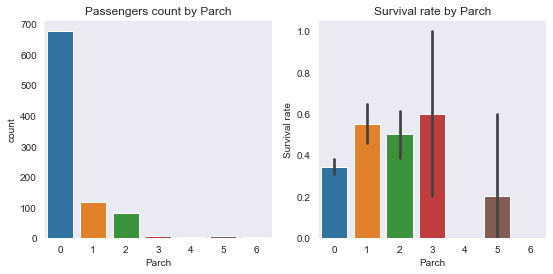

In [42]:
# Analysing passenger count and survival rate by 'Parch'(number of parents or children)
fig, axarr = plt.subplots(1,2,figsize=(9,4))
a = sns.countplot(df['Parch'], ax=axarr[0]).set_title('Passengers count by Parch')
axarr[1].set_title('Survival rate by Parch')
b = sns.barplot(x='Parch', y='Survived', data=df, ax=axarr[1]).set_ylabel('Survival rate')

In [44]:
# Combining 'Sibsp' and 'Parch' into single variable family size
df['Fam_size'] = df['SibSp'] + df['Parch'] + 1

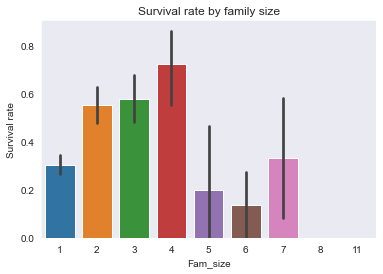

In [45]:
# Plotting Survival rate by family size
plt.title('Survival rate by family size')
g = sns.barplot(x=df.Fam_size, y=df.Survived).set_ylabel('Survival rate')

In [46]:
# Defining family types
df['Fam_type'] = pd.cut(df.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

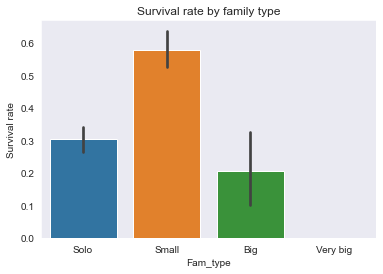

In [47]:
# Plotting survival rate by family type
plt.title('Survival rate by family type')
a = sns.barplot(x=df.Fam_type, y=df.Survived).set_ylabel('Survival rate')

In [48]:
# Feature selection
y = df['Survived']
features = ['Pclass', 'Sex', 'Fare','Embarked', 'Fam_type']
X = df[features]
X.head()

,Pclass,Sex,Fare,Embarked,Fam_type
PassengerId,,,,,
1,3,male,7.2500,S,Small
2,1,female,71.2833,C,Small
3,3,female,7.9250,S,Solo
4,1,female,53.1000,S,Small
5,3,male,8.0500,S,Solo
